In [45]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [47]:
from surprise import KNNBasic, KNNBaseline, KNNWithMeans,KNNWithZScore,BaselineOnly, CoClustering,SVD,SVDpp,SlopeOne,NMF
from surprise.model_selection import cross_validate, train_test_split

from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise import accuracy

In [48]:
rat=pd.read_csv("ratings.txt",delimiter=" ",names=["user-id","item-id","rating-value"])
rat.shape
rat

,user-id,item-id,rating-value
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
...,...,...,...
35492,1508,84,3.5
35493,1508,17,4.0
35494,1508,669,1.0
35495,1508,686,2.5


In [49]:
trustval=pd.read_csv("trust.txt",delimiter=" ",names=["user-id (trustor)","user-id (trustee)","trust-value"])
trustval.head()
#trustval.shape

,user-id (trustor),user-id (trustee),trust-value
0,2,966,1
1,2,104,1
2,5,1509,1
3,6,1192,1
4,7,1510,1


In [50]:
rat.shape
usercount=rat['user-id'].nunique()
itemcount=rat['item-id'].nunique()

print("User:",usercount)
print("Item:",itemcount)
rat.shape
#1508*2071=31,23,068

User: 1508
Item: 2071


(35497, 3)

In [51]:
max_value = trustval['trust-value'].max()
max_value

1

In [52]:
max_value = rat['rating-value'].max()
max_value
rat['rating-value'].min()

0.5

In [53]:
user_rating_matrix=rat.pivot_table(index='user-id', columns='item-id',values='rating-value',fill_value=0)

In [54]:
User_Item_rat_np=user_rating_matrix.values
User_Item_rat_np

array([[2. , 4. , 3.5, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 4. , 0. , ..., 0. , 0. , 0. ],
       [1.5, 3. , 2. , ..., 0. , 0. , 0. ]])

In [55]:
count=0
for i in user_rating_matrix.values:
    for j in i:
        if(j==0):
            count+=1

print(count/(usercount*itemcount))

0.9886348936366419


In [56]:
user_rating_trust=trustval.pivot_table(index='user-id (trustor)', columns='user-id (trustee)',values='trust-value')
user_rating_trust

In [57]:
reader = Reader(rating_scale=(0.5, 4))
data = Dataset.load_from_df(rat[['user-id','item-id','rating-value']], reader)
trainset = data.build_full_trainset()
testset = trainset.build_testset()

In [58]:
'''srat=rat

user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

srat['user-id'] = user_encoder.fit_transform(srat['user-id'])
srat['item-id'] = item_encoder.fit_transform(srat['item-id'])
#train_data, test_data = train_test_split(data, test_size=0.2)'''

"srat=rat\n\nuser_encoder = LabelEncoder()\nitem_encoder = LabelEncoder()\n\nsrat['user-id'] = user_encoder.fit_transform(srat['user-id'])\nsrat['item-id'] = item_encoder.fit_transform(srat['item-id'])\n#train_data, test_data = train_test_split(data, test_size=0.2)"

In [67]:
'''class AutoTrustRec(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim):
        super(AutoTrustRec, self).__init__()
        self.user_embeddings = nn.Embedding(num_users, embedding_dim)
        self.item_embeddings = nn.Embedding(num_items, embedding_dim)
        self.trust_embeddings = nn.Embedding(num_users, embedding_dim)


    def forward(self, user, item):
        # User and item embeddings
        user_embeds = self.user_embeddings(user)
        item_embeds = self.item_embeddings(item)    
        # Explicit trust embeddings
        trust_embeds = self.trust_embeddings(user)
        pred = torch.sum(weighted_user * item_embeds, dim=1)
    
    
# Create an instance of the AutoTrustRec model
num_users = len(rat['user-id'].unique())
num_items = len(rat['item-id'].unique())
embedding_dim = 32
auto_trust_model = AutoTrustRec(num_users, num_items, embedding_dim)
'''

In [60]:
'''# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(auto_trust_model.parameters(), lr=0.01)'''

In [ ]:
'''# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(auto_trust_model.parameters(), lr=0.01)

# Convert data to PyTorch tensors
train_user = torch.LongTensor(train_data['user_id'].values)
train_item = torch.LongTensor(train_data['item_id'].values)
train_rating = torch.Tensor(train_data['rating'].values)'''

In [ ]:
results_dict = {}

## 1.KNNBasic algorithm

In [ ]:
# Initialize and fit the KNNBasic model
knn_basic = KNNBasic(k=21,sim_options={'name': 'cosine', 'user_based': False})
knn_basic.fit(trainset)
knn_basic_predictions = knn_basic.test(testset)

rmsebasic= accuracy.rmse(knn_basic_predictions)
maebasic = accuracy.mae(knn_basic_predictions)

knn_basic_predictions

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7509
MAE:  0.5733


[Prediction(uid=1, iid=1, r_ui=2.0, est=3.4105501675739127, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1, iid=2, r_ui=4.0, est=3.419855057199542, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1, iid=3, r_ui=3.5, est=3.415440942396041, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1, iid=4, r_ui=3.0, est=3.416538467210826, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1, iid=5, r_ui=4.0, est=3.4183823885414566, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1, iid=6, r_ui=3.5, est=3.4164047557965613, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1, iid=7, r_ui=3.5, est=3.4170004353494, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1, iid=8, r_ui=3.0, est=3.414281578903563, details={'actual_k': 12, 'was_impossible': False}),
 Prediction(uid=1, iid=9, r_ui=2.5, est=3.413182039528703, details={'actual_k': 12, 'was_impossible': False}),


In [ ]:
# Initialize the KNNBasic model
model = KNNBasic()
cv=[5,10,15,20]
# Perform cross-validation with the model
for i in cv:
    results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=i, verbose=True)
    if i==10:
        results_dict['knnbasic'] = results


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8528  0.8568  0.8693  0.8662  0.8745  0.8639  0.0080  
MAE (testset)     0.6478  0.6512  0.6571  0.6545  0.6577  0.6537  0.0037  
Fit time          2.78    1.70    1.95    1.88    1.94    2.05    0.37    
Test time         5.90    7.26    7.62    7.00    6.30    6.82    0.63    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

## 2. KNNBaseline algorithm

In [ ]:
# Initialize and fit the KNNBasic model
knn_baseline = KNNBaseline(k=21,sim_options={'name': 'cosine', 'user_based': False})
knn_baseline.fit(trainset)
knn_baseline_predictions = knn_baseline.test(testset)

rmsebaseline = accuracy.rmse(knn_baseline_predictions)
maebaseline = accuracy.mae(knn_baseline_predictions)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7201
MAE:  0.5491


In [ ]:
# Initialize the KNNBaseline model
model = KNNBaseline()
cv=[5,10,15,20]
# Perform cross-validation with the model
for i in cv:
    results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=i, verbose=True)
    if i==10:
        results_dict['knnbaseline']=results

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8120  0.8187  0.8209  0.8255  0.8224  0.8199  0.0045  
MAE (testset)     0.6152  0.6208  0.6222  0.6314  0.6255  0.6230  0.0054  
Fit time          2.99    1.62    1.90    1.49    1.48    1.90    0.57    
Test time         5.14    5.05    5.09    5.30    5.14    5.14    0.08    
Estimating biases using als...
Computing th

## 3.KNNwithMeans algorithm

In [ ]:
# Initialize and fit the KNNBasic model
knn_withmeans = KNNWithMeans(k=40,sim_options={'name': 'cosine', 'user_based': False})
knn_withmeans.fit(trainset)
knn_withmeans_predictions = knn_withmeans.test(testset)

rmseknnwithmeans= accuracy.rmse(knn_withmeans_predictions)
maeknnwithmeans = accuracy.mae(knn_withmeans_predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# Initialize the KNNWithMeans model
model = KNNWithMeans()
cv=[5,10,15,20]
# Perform cross-validation with the model
for i in cv:
    results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=i, verbose=True)
    if i==10:
        results_dict['knnwithmeans']=results


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8201  0.8314  0.8358  0.8212  0.8281  0.8273  0.0060  
MAE (testset)     0.6223  0.6302  0.6362  0.6290  0.6320  0.6299  0.0045  
Fit time          2.74    1.62    1.99    1.84    1.63    1.96    0.41    
Test time         6.02    5.68    5.61    4.73    4.97    5.40    0.48    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

## 4. SVD algorithm

In [ ]:
 # Apply SVD
svd = SVD(n_factors=100, n_epochs=20, init_std_dev=0.01, lr_all=0.007, reg_all=0.02)
svd.fit(trainset)
prediction_svd = svd.test(testset)

rmsesvd= accuracy.rmse(prediction_svd)
maesvd = accuracy.mae(prediction_svd)

In [ ]:
# Initialize the SVD model with hyperparameters
svd = SVD(n_factors=100, n_epochs=20,init_std_dev=0.01,lr_all=0.007,reg_all=0.02)

cv=[5,10,15,20]
# Perform cross-validation with the model
for i in cv:
    results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=i, verbose=True)
    if i==10:
        results_dict['svd']=results

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8052  0.7907  0.7905  0.8015  0.8084  0.7993  0.0074  
MAE (testset)     0.6183  0.6110  0.6094  0.6188  0.6251  0.6165  0.0057  
Fit time          0.71    0.67    0.56    0.71    0.80    0.69    0.08    
Test time         0.07    0.06    0.07    0.22    0.08    0.10    0.06    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.7864  0.8050  0.7940  0.7881  0.7859  0.7923  0.8012  0.8066  0.8062  0.7938  0.7960  0.0078  
MAE (testset)     0.6072  0.6303  0.6130  0.6064  0.6073  0.6056  0.6126  0.6258  0.6179  0.6133  0.6139  0.0080  
Fit time          0.92    1.05    1.02    1.04    0.84    0.73    0.66    0.75    0.97    0.80    0.88    0.13    
Test time         0.05    0.04    0.04    0.09    0.03  

## 5. SVD++ algorithm

In [ ]:
# Apply SVD++
svdpp = SVDpp(n_factors=20, n_epochs=20, init_std_dev=0.01, lr_all=0.005, reg_all=0.02)
svdpp.fit(trainset)
prediction_svdpp = svdpp.test(testset)

rmsesvdpp= accuracy.rmse(prediction_svdpp)
maesvdpp = accuracy.mae(prediction_svdpp)

In [ ]:
# Initialize the SVD model with hyperparameters
svdpp = SVDpp(n_factors=20, n_epochs=20,init_std_dev=0.01,lr_all=0.005,reg_all=0.02)

cv=[5,10,15,20]
# Perform cross-validation with the model
for i in cv:
    results = cross_validate(svdpp, data, measures=['RMSE', 'MAE'], cv=i, verbose=True)
    if i==10:
        results_dict['svd++']=results

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7923  0.8026  0.7931  0.7991  0.8119  0.7998  0.0071  
MAE (testset)     0.6153  0.6222  0.6140  0.6177  0.6241  0.6187  0.0039  
Fit time          3.22    2.48    3.07    2.61    2.70    2.81    0.28    
Test time         0.51    0.55    0.89    0.62    0.76    0.67    0.14    
Evaluating RMSE, MAE of algorithm SVDpp on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8040  0.8106  0.7823  0.8012  0.7859  0.7944  0.8163  0.8027  0.8041  0.7798  0.7981  0.0116  
MAE (testset)     0.6222  0.6255  0.6099  0.6180  0.6077  0.6165  0.6247  0.6173  0.6215  0.6051  0.6168  0.0068  
Fit time          3.91    3.78    3.82    3.92    3.83    3.66    4.01    3.63    5.10    3.62    3.93    0.41    
Test time         0.40    0.42    0.28    0.28    0.

## 6.Co-clustering algorithm

In [ ]:
coclustering=CoClustering(n_cltr_u=3,n_cltr_i=4,n_epochs=20)
coclustering.fit(trainset)
coclustering_prediction = coclustering.test(testset)

rmseclustering= accuracy.rmse(coclustering_prediction)
maeclustering = accuracy.mae(coclustering_prediction)

In [ ]:
coclustering=CoClustering(n_cltr_u=3,n_cltr_i=4,n_epochs=20)

cv=[5,10,15,20]
# Perform cross-validation with the model
for i in cv:
    results = cross_validate(svdpp, data, measures=['RMSE', 'MAE'], cv=i, verbose=True)
    if i==10:
        results_dict['coclustering']=results

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7968  0.7984  0.7987  0.7947  0.8150  0.8007  0.0073  
MAE (testset)     0.6158  0.6188  0.6195  0.6132  0.6273  0.6189  0.0047  
Fit time          4.38    3.33    6.44    4.92    4.83    4.78    1.00    
Test time         0.61    1.37    1.30    1.25    0.77    1.06    0.31    
Evaluating RMSE, MAE of algorithm SVDpp on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8102  0.7875  0.8044  0.7873  0.7834  0.7898  0.8126  0.7998  0.7852  0.8130  0.7973  0.0114  
MAE (testset)     0.6284  0.6079  0.6226  0.6092  0.6063  0.6044  0.6377  0.6146  0.6005  0.6292  0.6161  0.0119  
Fit time          5.46    4.64    3.97    5.65    5.12    5.59    7.40    6.81    6.37    5.20    5.62    0.96    
Test time         0.35    0.58    0.40    0.47    0.

In [ ]:
results_dict

{'knnbasic': {'test_rmse': array([0.82678313, 0.85392085, 0.85669655, 0.8441807 , 0.85192898,
         0.88001783, 0.89297678, 0.8475959 , 0.88023746, 0.84026575,
         0.83043452, 0.84647331, 0.87600068, 0.87686687, 0.84478713,
         0.8448677 , 0.84779547, 0.86330752, 0.84223317, 0.85363391]),
  'test_mae': array([0.62242178, 0.64306312, 0.63411523, 0.64822958, 0.64638938,
         0.66273003, 0.66872956, 0.64791391, 0.66669538, 0.63203121,
         0.63041353, 0.64338442, 0.65795304, 0.6744673 , 0.63720169,
         0.63953229, 0.63803929, 0.65551564, 0.63407306, 0.64063957]),
  'fit_time': (2.0987496376037598,
   1.5660524368286133,
   1.9070985317230225,
   1.9473590850830078,
   2.261831283569336,
   1.8363490104675293,
   2.3168158531188965,
   2.428924560546875,
   1.953752040863037,
   1.771486520767212,
   1.7180733680725098,
   1.4804837703704834,
   1.6939420700073242,
   1.5196456909179688,
   1.641993522644043,
   2.6502835750579834,
   1.8894670009613037,
   1.7089

## Analysing and comparing models

RMSE:[0.8550502097369069, 0.8167645119506117, 0.8234557453614798, 0.7938076415072474, 0.7975047769377844],MAE:[0.6461769510261753, 0.6187668468359033, 0.6273599545021737, 0.6114501847339933, 0.6161767591795557]


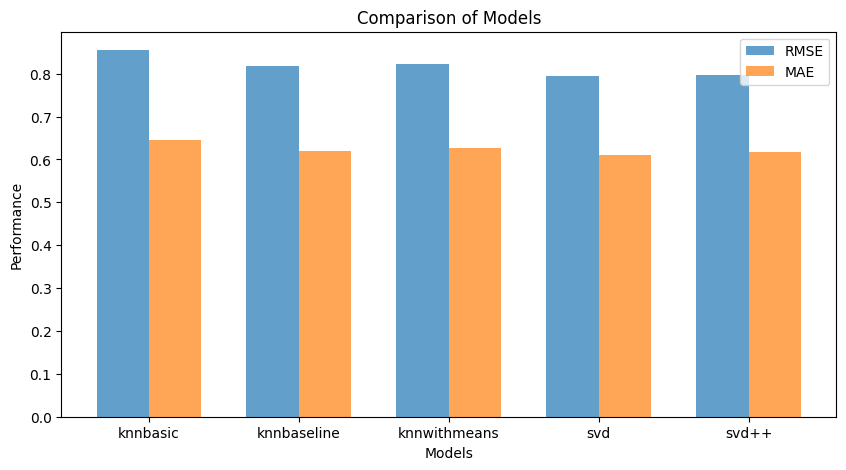

In [ ]:
import matplotlib.pyplot as plt

model_names = results_dict.keys()
n_models = len(model_names)
bar_width = 0.35

rmse_values = [result['test_rmse'].mean() for result in results_dict.values()]
mae_values = [result['test_mae'].mean() for result in results_dict.values()]

print(f'RMSE:{rmse_values},MAE:{mae_values}')

index = range(n_models)

plt.figure(figsize=(10, 5))

# Create separate bars for RMSE and MAE
plt.bar(index, rmse_values, bar_width, label='RMSE', alpha=0.7)
plt.bar([i + bar_width for i in index], mae_values, bar_width, label='MAE', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Performance')
plt.title('Comparison of Models ( CV = 10 )')
plt.xticks([i + bar_width / 2 for i in index], model_names)
plt.legend()
plt.show()

In [84]:
rmsebaseline=[]
maebaseline=[]
# Initialize the KNNBaseline model

# Perform cross-validation with the model
for i in range(1,40):
    model = KNNBaseline(k=i,sim_options={'name': 'cosine', 'user_based': False})
    results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)
    rmsebaseline.append(results['test_rmse'].mean())
    maebaseline.append(results['test_mae'].mean())
    

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Comput

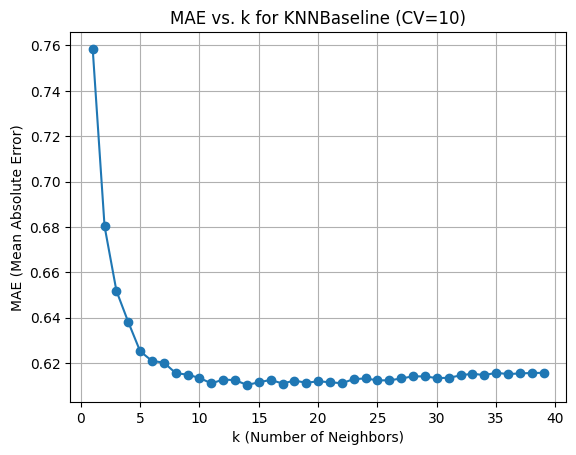

In [86]:
import matplotlib.pyplot as plt
k_values=[]
for k in range(1,40):
    k_values.append(k)
plt.plot(k_values,maebaseline, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('MAE (Mean Absolute Error)')
plt.title('MAE vs. k for KNNBaseline (CV=10)')
plt.grid(True)
plt.show()

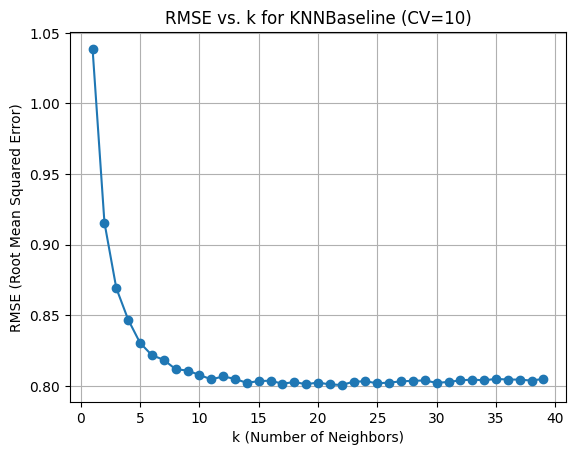

In [87]:
import matplotlib.pyplot as plt
k_values=[]
for k in range(1,40):
    k_values.append(k)
plt.plot(k_values,rmsebaseline, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.title('RMSE vs. k for KNNBaseline (CV=10)')
plt.grid(True)
plt.show()

In [ ]:
'''# Extract the 'est' values from the list of tuples (3rd element, index 2)
truth=np.array([prediction[2] for prediction in knn_basic_predictions])
estimates = [prediction[3] for prediction in knn_basic_predictions]

# Convert the list of 'est' values to a NumPy array
estimates_array = np.array(estimates)'''

In [ ]:
'''
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(truth,estimates_array)
mse'''

0.7003358278910865